In [1]:
# CELL 1 — Imports and unzip dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.style.use("seaborn-v0_8")

# Path to your wine zip
zip_path = Path(r"C:\Users\VAIBHAB\wine.zip")

if not zip_path.exists():
    raise FileNotFoundError(f"wine.zip not found at {zip_path}")

extract_dir = Path("./wine_data")
extract_dir.mkdir(exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)

print("Extracted to:", extract_dir)


Extracted to: wine_data


In [2]:
# CELL 2 — Load red & white and combine

red = pd.read_csv(extract_dir / "winequality-red.csv", sep=";")
white = pd.read_csv(extract_dir / "winequality-white.csv", sep=";")

# Add type feature: 1 = red, 0 = white
red["type"] = 1
white["type"] = 0

df = pd.concat([red, white], ignore_index=True)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (6497, 13)
Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


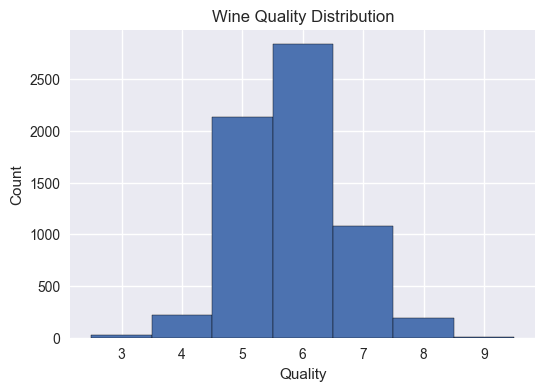

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [3]:
# CELL 3 — Simple EDA

plt.figure(figsize=(6, 4))
plt.hist(df["quality"], bins=range(int(df["quality"].min()),
                                   int(df["quality"].max())+2),
         edgecolor="black", align="left")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Wine Quality Distribution")
plt.show()

df.describe()


In [4]:
# CELL 4 — Features/target, split, and scaling

X = df.drop(columns=["quality"]).values.astype(np.float64)
y = df["quality"].values.astype(np.float64).reshape(-1, 1)

# 70% train, 15% val, 15% test (via 85/15 and then split train_full)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1764706, random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)
print("Test :", X_test.shape, y_test.shape)

# scale X
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_val   = x_scaler.transform(X_val)
X_test  = x_scaler.transform(X_test)

# scale y (helps GD)
y_mean = y_train.mean(axis=0)
y_std  = y_train.std(axis=0) + 1e-8

y_train_s = (y_train - y_mean) / y_std
y_val_s   = (y_val   - y_mean) / y_std
y_test_s  = (y_test  - y_mean) / y_std

print("y mean/std (train):", y_mean.item(), y_std.item())


Train: (4547, 12) (4547, 1)
Val  : (975, 12) (975, 1)
Test : (975, 12) (975, 1)
y mean/std (train): 5.8154827358698045 0.8786235530572684


In [5]:
# CELL 5 — Activation functions + Loss (ReLU version)

def relu(z):
    return np.maximum(0, z)

def drelu(z):
    return (z > 0).astype(float)

def mse_loss(y_pred, y_true):
    diff = y_pred - y_true
    return np.mean(diff ** 2)


In [6]:
# CELL 6 — Initialize weights using He initialization (best for ReLU)

rng = np.random.default_rng(42)

input_dim = X_train.shape[1]
h1, h2 = 64, 32
out_dim = 1

def init_he(n_in, n_out):
    W = rng.normal(0, np.sqrt(2.0 / n_in), size=(n_in, n_out))
    b = np.zeros((1, n_out))
    return W, b

W1, b1 = init_he(input_dim, h1)
W2, b2 = init_he(h1, h2)
W3, b3 = init_he(h2, out_dim)

print("Shapes:", W1.shape, W2.shape, W3.shape)


Shapes: (12, 64) (64, 32) (32, 1)


In [7]:
# CELL 7 — Forward pass

def forward(X):
    z1 = X @ W1 + b1
    a1 = relu(z1)

    z2 = a1 @ W2 + b2
    a2 = relu(z2)

    z3 = a2 @ W3 + b3
    y_pred = z3  # Linear output (best for regression)

    return z1, a1, z2, a2, z3, y_pred


In [8]:
# CELL 8 — Backpropagation and GD update (ReLU version)

def backward_and_update(X, y, z1, a1, z2, a2, y_pred, lr, l2=1e-4):
    global W1, b1, W2, b2, W3, b3

    m = X.shape[0]

    # dL/dy_pred
    d3 = (2.0 / m) * (y_pred - y)

    # Layer 3
    dW3 = a2.T @ d3 + l2 * W3
    db3 = np.sum(d3, axis=0, keepdims=True)

    # Layer 2
    d2 = (d3 @ W3.T) * drelu(z2)
    dW2 = a1.T @ d2 + l2 * W2
    db2 = np.sum(d2, axis=0, keepdims=True)

    # Layer 1
    d1 = (d2 @ W2.T) * drelu(z1)
    dW1 = X.T @ d1 + l2 * W1
    db1 = np.sum(d1, axis=0, keepdims=True)

    # Update
    W3 -= lr * dW3
    b3 -= lr * db3
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1


In [9]:
# CELL 9 — Training loop (improved)

epochs = 400
batch_size = 32
lr = 0.05          # Works best with ReLU + He
l2 = 1e-4
patience = 80
best_val_loss = np.inf
patience_counter = 0

train_losses = []
val_losses = []

n_train = X_train.shape[0]

for ep in range(1, epochs + 1):
    idx = np.random.permutation(n_train)
    X_shuf = X_train[idx]
    y_shuf = y_train[idx]  # NOTE: unscaled y

    for start in range(0, n_train, batch_size):
        end = start + batch_size
        xb = X_shuf[start:end]
        yb = y_shuf[start:end]

        z1, a1, z2, a2, z3, yb_pred = forward(xb)
        backward_and_update(xb, yb, z1, a1, z2, a2, yb_pred, lr, l2=l2)

    # Compute losses
    _, _, _, _, _, train_pred = forward(X_train)
    _, _, _, _, _, val_pred   = forward(X_val)

    train_loss = mse_loss(train_pred, y_train)
    val_loss   = mse_loss(val_pred,   y_val)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if val_loss < best_val_loss - 1e-6:
        best_val_loss = val_loss
        patience_counter = 0
        best_params = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
    else:
        patience_counter += 1

    if ep % 50 == 0:
        print(f"Epoch {ep}/{epochs} | Train: {train_loss:.4f} | Val: {val_loss:.4f}")

    if patience_counter >= patience:
        print(f"Early stopping at epoch {ep}")
        break

W1, b1, W2, b2, W3, b3 = best_params


Epoch 50/400 | Train: 0.7097 | Val: 0.8031
Epoch 100/400 | Train: 1.0889 | Val: 1.1211
Early stopping at epoch 108


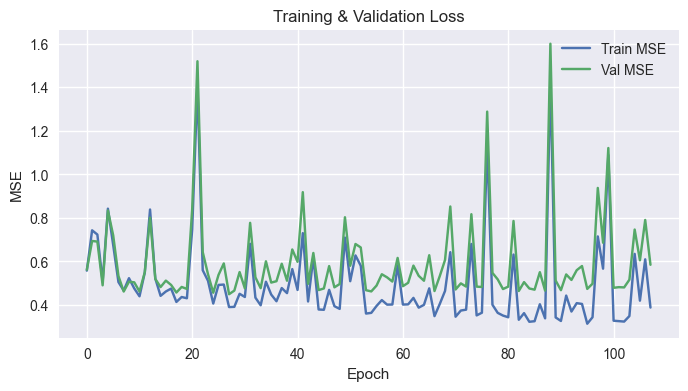

In [10]:
# CELL 10 — Plot and save Loss Curve

plt.figure(figsize=(8, 4))
plt.plot(train_losses, label="Train MSE")
plt.plot(val_losses, label="Val MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Training & Validation Loss")
plt.legend()

plt.savefig("loss_curve.png", dpi=300, bbox_inches="tight")
plt.show()


In [11]:
# CELL 11 — Evaluate on Train/Val/Test

_, _, _, _, _, train_pred = forward(X_train)
_, _, _, _, _, val_pred   = forward(X_val)
_, _, _, _, _, test_pred  = forward(X_test)

def report(name, y_true, y_hat):
    mse  = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_hat)
    r2   = r2_score(y_true, y_hat)
    print(f"{name} -> MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

print("Final performance:")
report("Train", y_train, train_pred)
report("Val  ", y_val,   val_pred)
report("Test ", y_test,  test_pred)


Final performance:
Train -> MSE: 0.3906, RMSE: 0.6250, MAE: 0.4876, R²: 0.4940
Val   -> MSE: 0.4497, RMSE: 0.6706, MAE: 0.5212, R²: 0.3826
Test  -> MSE: 0.4655, RMSE: 0.6823, MAE: 0.5379, R²: 0.3808


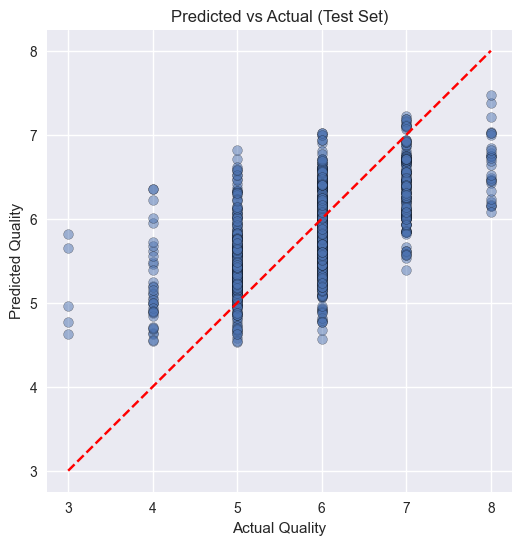

In [12]:
# CELL 12 — Predicted vs Actual (and save figure)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, test_pred, alpha=0.50, edgecolor="black")
mn = min(y_test.min(), test_pred.min())
mx = max(y_test.max(), test_pred.max())
plt.plot([mn, mx], [mn, mx], "r--")

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted vs Actual (Test Set)")

plt.savefig("pred_vs_actual.png", dpi=300, bbox_inches="tight")
plt.show()


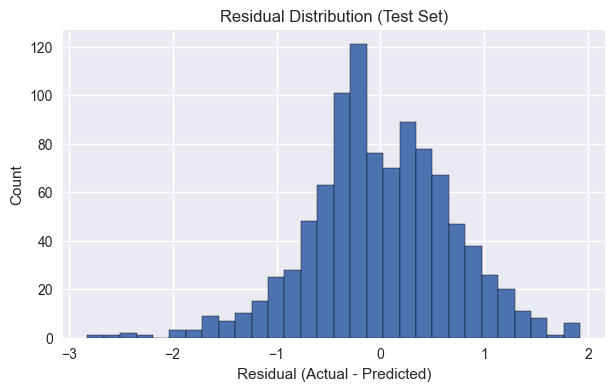

In [13]:
# CELL 13 — Residual distribution (and save)

residuals = y_test.ravel() - test_pred.ravel()

plt.figure(figsize=(7, 4))
plt.hist(residuals, bins=30, edgecolor="black")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.title("Residual Distribution (Test Set)")

plt.savefig("residuals.png", dpi=300, bbox_inches="tight")
plt.show()
